# Lab №2

## Выполнение

### 0. Импортируем необходимые библиотеки 

In [28]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Импортируем модель Stanford

In [29]:
robot = rtb.models.DH.Stanford()
print(robot)

DHRobot: Stanford arm (by Victor Scheinman), 6 joints (RRPRRR), dynamics, standard DH parameters
┌────────┬───────┬────────┬────────┬─────────────────────┬────────┐
│   θⱼ   │  dⱼ   │   aⱼ   │   ⍺ⱼ   │         q⁻          │   q⁺   │
├────────┼───────┼────────┼────────┼─────────────────────┼────────┤
│  q1    │ 0.412 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q2    │ 0.154 │      0 │  90.0° │             -170.0° │ 170.0° │
│ -90.0° │    q3 │ 0.0203 │   0.0° │ 0.30479999999999996 │   1.27 │
│  q4    │     0 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q5    │     0 │      0 │  90.0° │              -90.0° │  90.0° │
│  q6    │     0 │      0 │   0.0° │             -170.0° │ 170.0° │
└────────┴───────┴────────┴────────┴─────────────────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬─────┬────┬─────┬─────┬─────┐
│ name │ q0  │ q1  │ q2 │ q3  │ q4  │ q5  │
├──────┼─────┼─────┼────┼─────┼─────┼─────┤
│   qr │  0° │  0° │  0 │  0° │  0° │  0° │
│   qz │  0° │  0° │  0 │  0°

1. Mass of the links

In [30]:
robot.links[0].m = 9.3
robot.links[1].m = 5
robot.links[2].m = 4.2
robot.links[3].m = 1.1
robot.links[4].m = 0.63
robot.links[5].m = 0.51

2. Center of mass of each link

In [31]:
robot.links[0].r = [0, 0.018, -0.11]
robot.links[1].r = [0, -1.1, 0]
robot.links[2].r = [0, 0, -6.4]
robot.links[3].r = [0, 0.092, -0.054]
robot.links[4].r = [0, 0.57, 0.003]
robot.links[5].r = [0, 0, 1.6]

3. Let's define the inertia tensor of each link. Filling: [Lxx, Lyy, Lzz, Lxy, Lyz, Lxz]

In [32]:
robot.links[0].I = [0.28, 0.26, 0.071, 0, 0, 0]
robot.links[1].I = [0.11, 0.018, 0.1, 0, 0, 0]
robot.links[2].I = [2.5, 2.5, 0.006, 0, 0, 0]
robot.links[3].I = [0.002, 0.001, 0.001, 0, 0, 0]
robot.links[4].I = [0.0003, 0.0004, 0, 0, 0, 0]
robot.links[5].I = [0.013,  0.013, 0.0003, 0, 0, 0]

4. Let's set the moment of inertia of the drive

In [33]:
robot.links[0].Jm = 0.95
robot.links[1].Jm = 2.2 
robot.links[2].Jm = 0.78
robot.links[3].Jm = 0.11
robot.links[4].Jm = 0.097
robot.links[5].Jm = 0.02

5. Let's define the coefficient of viscous friction of the drive

In [34]:
robot.links[0].B = 0 #0.0015
robot.links[1].B = 0 #0.000817
robot.links[2].B = 0 #0.00138
robot.links[3].B = 0 #0.0000712
robot.links[4].B = 0 #0.0000826
robot.links[5].B = 0 #0.0000367

6. Let's define the coefficient of Coulomb friction of the drive

In [35]:
robot.links[0].Tc = [0, 0] #[0.395, -0.435]
robot.links[1].Tc = [0, 0] #[0.126, -0.071]
robot.links[2].Tc = [0, 0] #[0.132, -0.105]
robot.links[3].Tc = [0, 0] #[0.0112, -0.0169]
robot.links[4].Tc = [0, 0] #[0.00926, -0.0145]
robot.links[5].Tc = [0, 0] #[0.00396, -0.0105]

7. Let's set the gear ratio for each link

In [36]:
robot.links[0].G = 1#-62.6111
robot.links[1].G = 1#107.8150000000000
robot.links[2].G = 1#-53.7063
robot.links[3].G = 1#76.0364
robot.links[4].G = 1#71.923
robot.links[5].G = 1#76.686

8. Let's set restrictions on the generalized coordinates for each link

In [37]:
robot.links[0].qlim = [-3, 3 ]#[-2.792526803190927, 2.792526803190927]
robot.links[1].qlim = [-3, 3] #[-0.785398163397448, 3.926990816987241]
robot.links[2].qlim = [0.3, 1.3] #[-3.926990816987241, 0.785398163397448]
robot.links[3].qlim = [-3, 3] #[-1.919862177193763, 2.967059728390360]
robot.links[4].qlim = [-1.6, 1.6] #[-1.745329251994330, 1.745329251994330]
robot.links[5].qlim = [-3, 3] #[-4.642575810304916, 4.642575810304916]

### 2. Зададим начальное положение робота и построим его

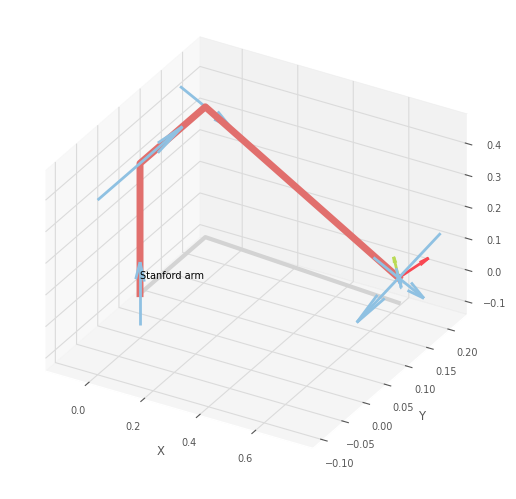

<Figure size 640x480 with 0 Axes>

In [38]:
q_start = [0, 2, 0.8, -1, 1, -2]
robot.plot(q_start)
plt.show()

### 3. Решим прямую задачу кинематики

In [39]:
T_start = robot.fkine(q_start)
print("Forward Kinematics Result (T_start):\n", T_start)

Forward Kinematics Result (T_start):
    0.4441   -0.4301    0.786     0.7274    
   0.8866    0.08473  -0.4546    0.1337    
   0.129     0.8988    0.419     0.07908   
   0         0         0         1         



### 6. Построим рабочую зону манипулятора

Инициализируем переменные

In [40]:
n = 20  # Количество точек по каждой оси
i = 0  # Просто счетчик
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]  # Записываем пределы перемещения для первых трех звеньев
pose = np.zeros([3,n**3])  # Создаем пустой массив для записи данных

Рассчитываем рабочую зону

In [41]:
# Проходимся перебором по каждой точке
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            Tt = robot.fkine([q1,q2,q3,0,0,0])  # Решаем ПЗК, меняя только первые 3 обобщенных координаты
            for j in range(3):
                pose[j][i] = Tt.t[j]  # Сохраняем точку
            i += 1

Строим рабочую зону

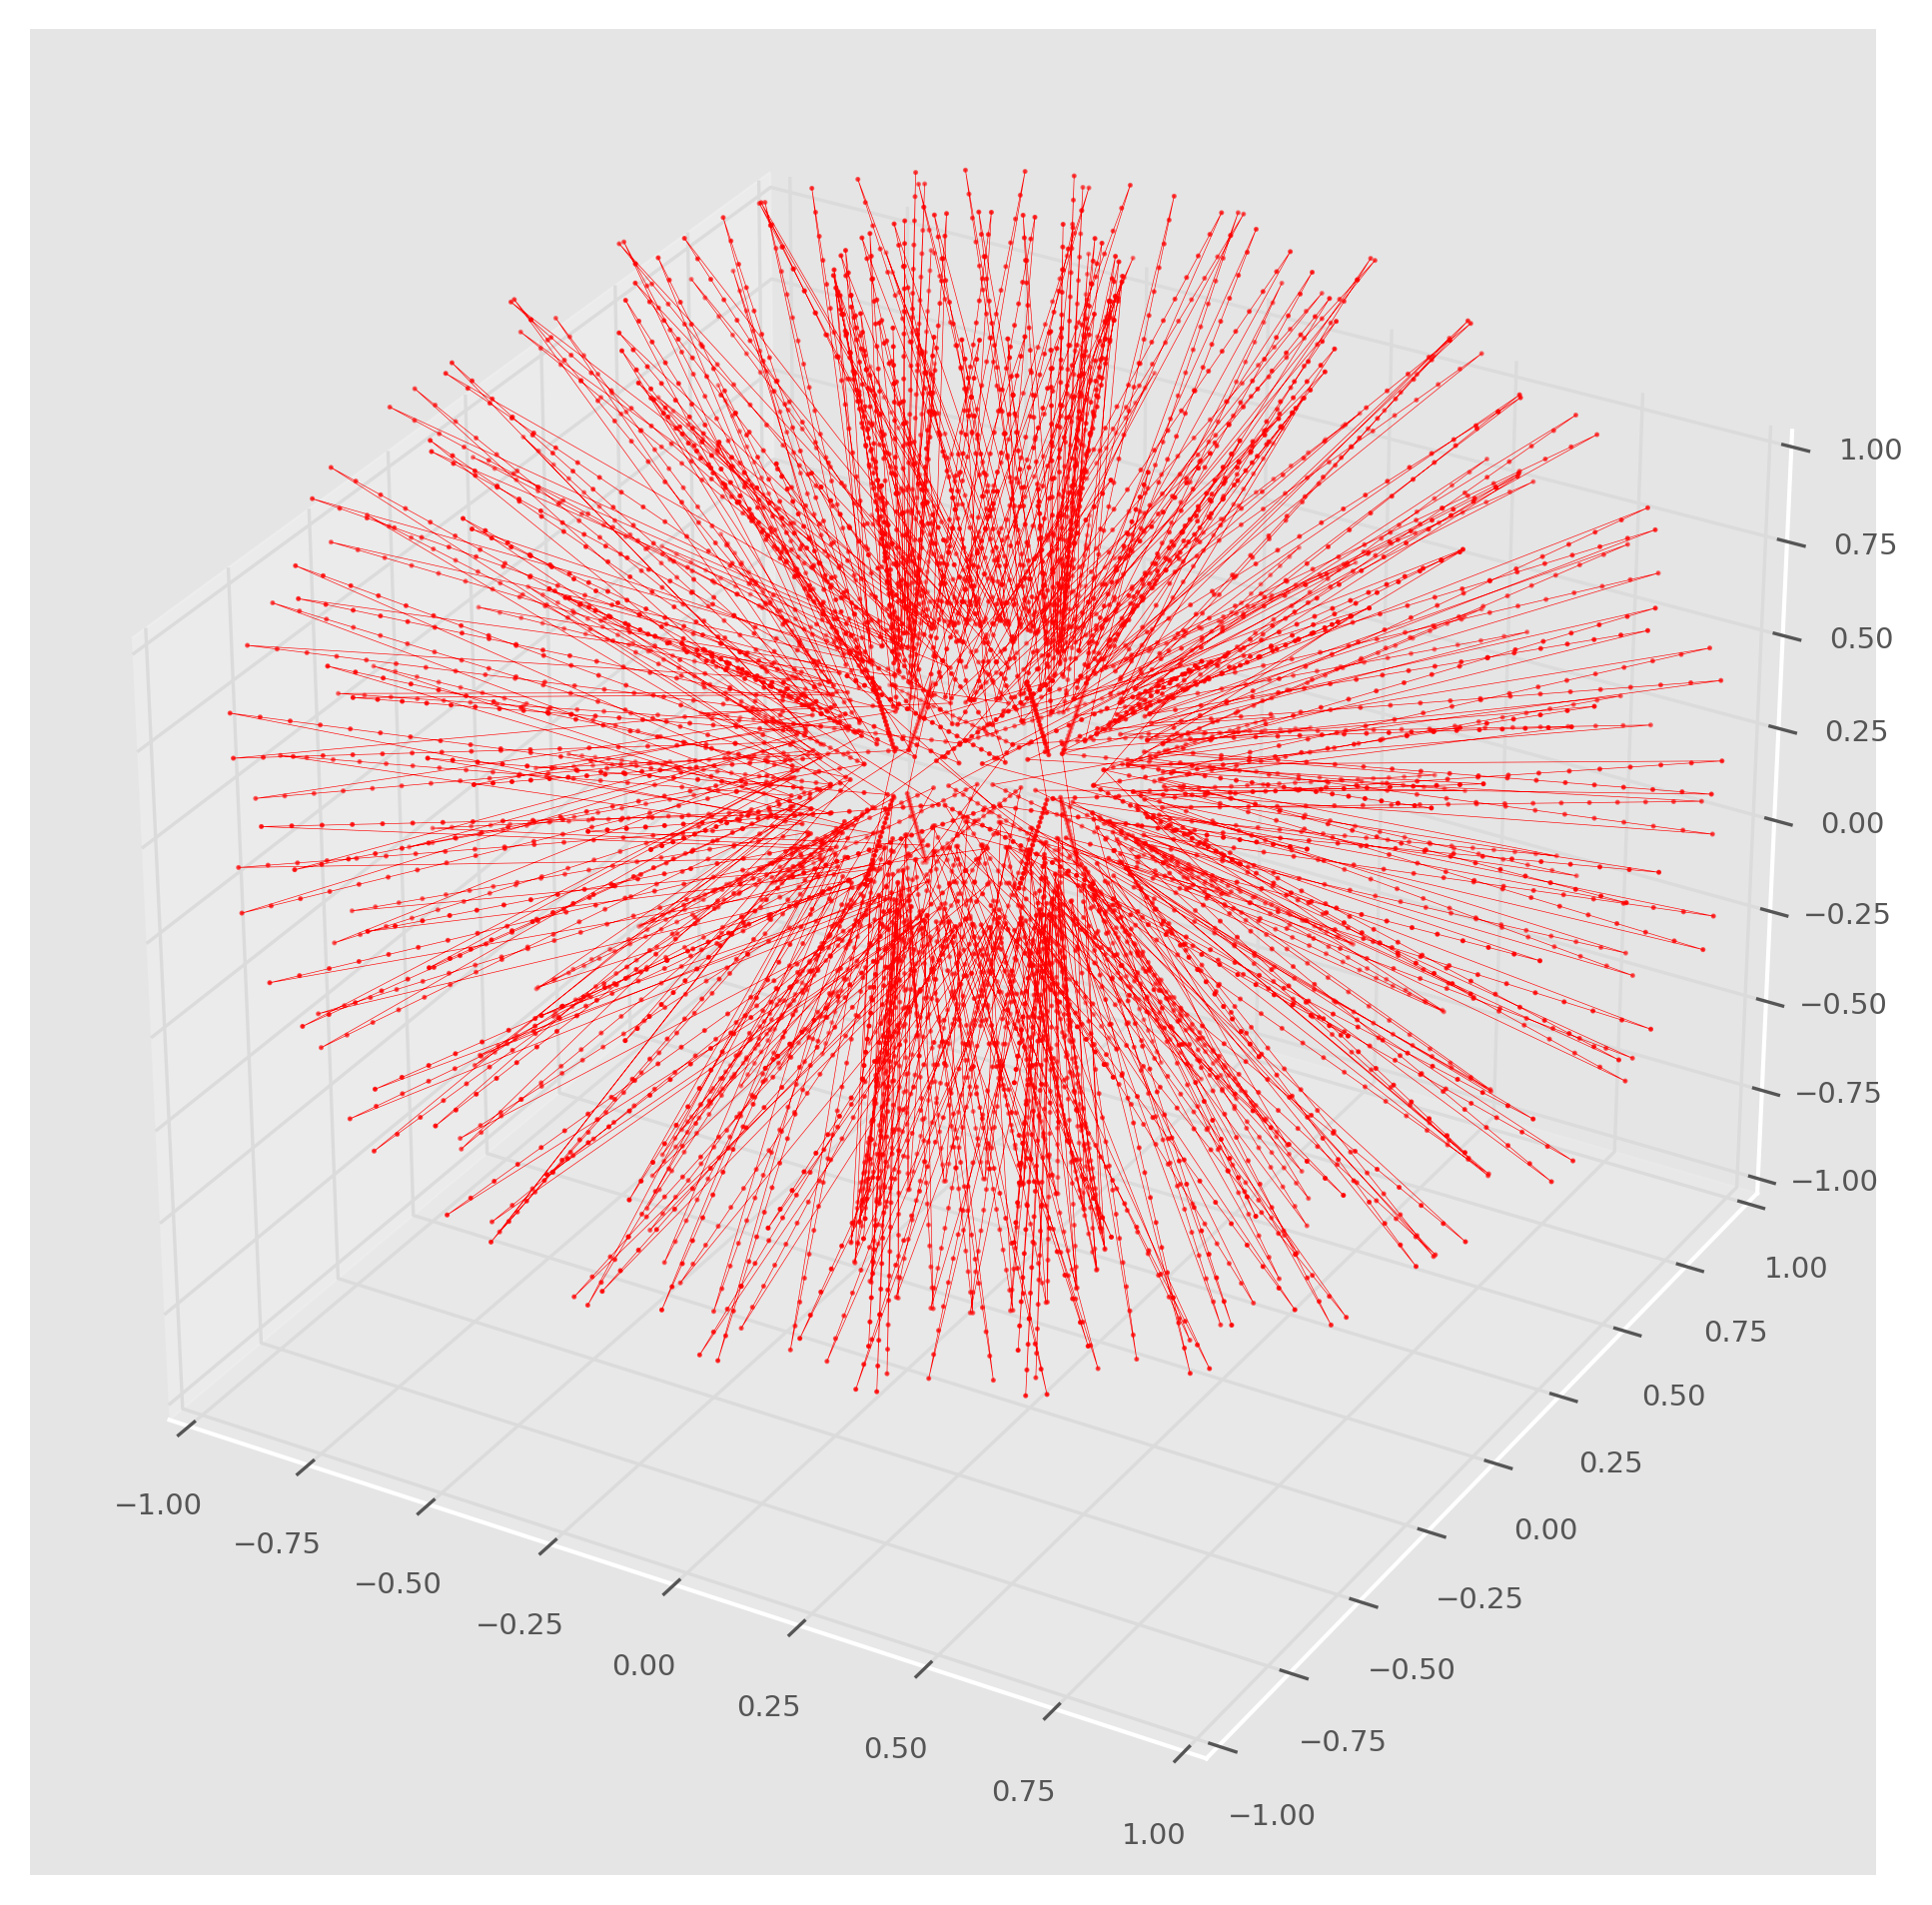

In [42]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

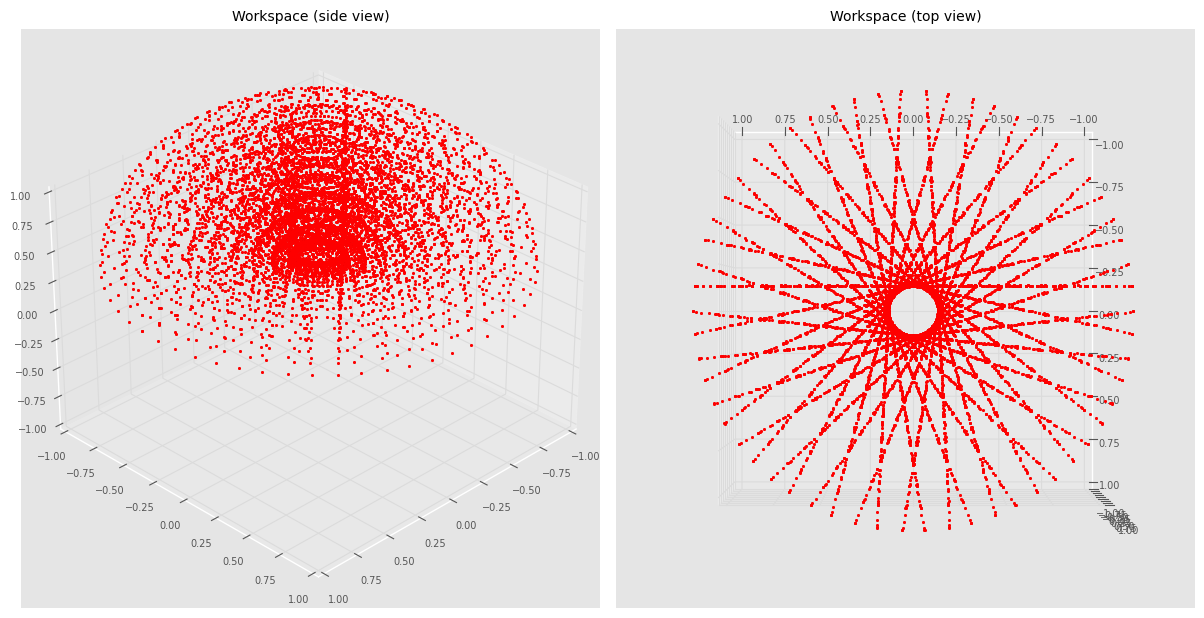

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Grid resolution for joint angles
q1 = np.linspace(-np.pi, np.pi, 30)
q2 = np.linspace(-np.pi/2, np.pi/2, 30)
q3 = np.linspace(0.1, 1.2, 10)        # Prismatic joint
q4 = np.linspace(-np.pi, np.pi, 10)   # Adding one more joint (wrist rotation)

points = []

# Compute workspace
for a in q1:
    for b in q2:
        for c in q3:
            for d in q4:
                q = [a, b, c, d, 0, 0]  # Keep q5 and q6 at zero
                T = robot.fkine(q)
                pos = T.t
                points.append(pos)

points = np.array(points)

# Plotting
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(points[:, 0], points[:, 1], points[:, 2], 'r.', markersize=1)
ax1.set_title("Workspace (side view)")
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_zlim([-1, 1])
ax1.view_init(elev=30, azim=45)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(points[:, 0], points[:, 1], points[:, 2], 'r.', markersize=1)
ax2.set_title("Workspace (top view)")
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])
ax2.view_init(elev=90, azim=90)

plt.tight_layout()
plt.show()


### 7. Выберем конечную точку и проверим её (решим обратную задачу кинематики)

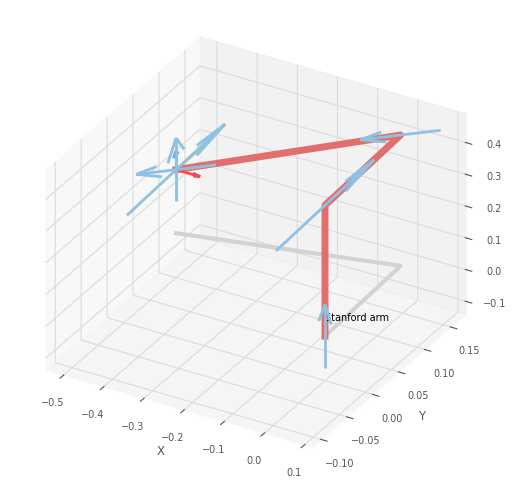

<Figure size 640x480 with 0 Axes>

In [44]:
point = [-0.5,0.1,0.2]
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

In [45]:
T_end_check = robot.fkine(q_end)
print("Target Pose:\n", T_end)
print("Pose from Inverse Kinematics:\n", T_end_check)

Target Pose:
 [[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0.1]
 [ 0.   0.   1.   0.2]
 [ 0.   0.   0.   1. ]]
Pose from Inverse Kinematics:
    1        -1.285e-08  4.086e-10 -0.5       
   1.285e-08  1         1.967e-08  0.1       
  -4.086e-10 -1.967e-08  1         0.2       
   0         0         0         1         



### 8. Спланируем траекторию

Спланируем траекторию методом 'jtraj' для $N$ = 100 точек

In [47]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'trapezoidal'

In [48]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'quintic'

In [49]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 9. Построим графики

Построим графики положений для каждого звена

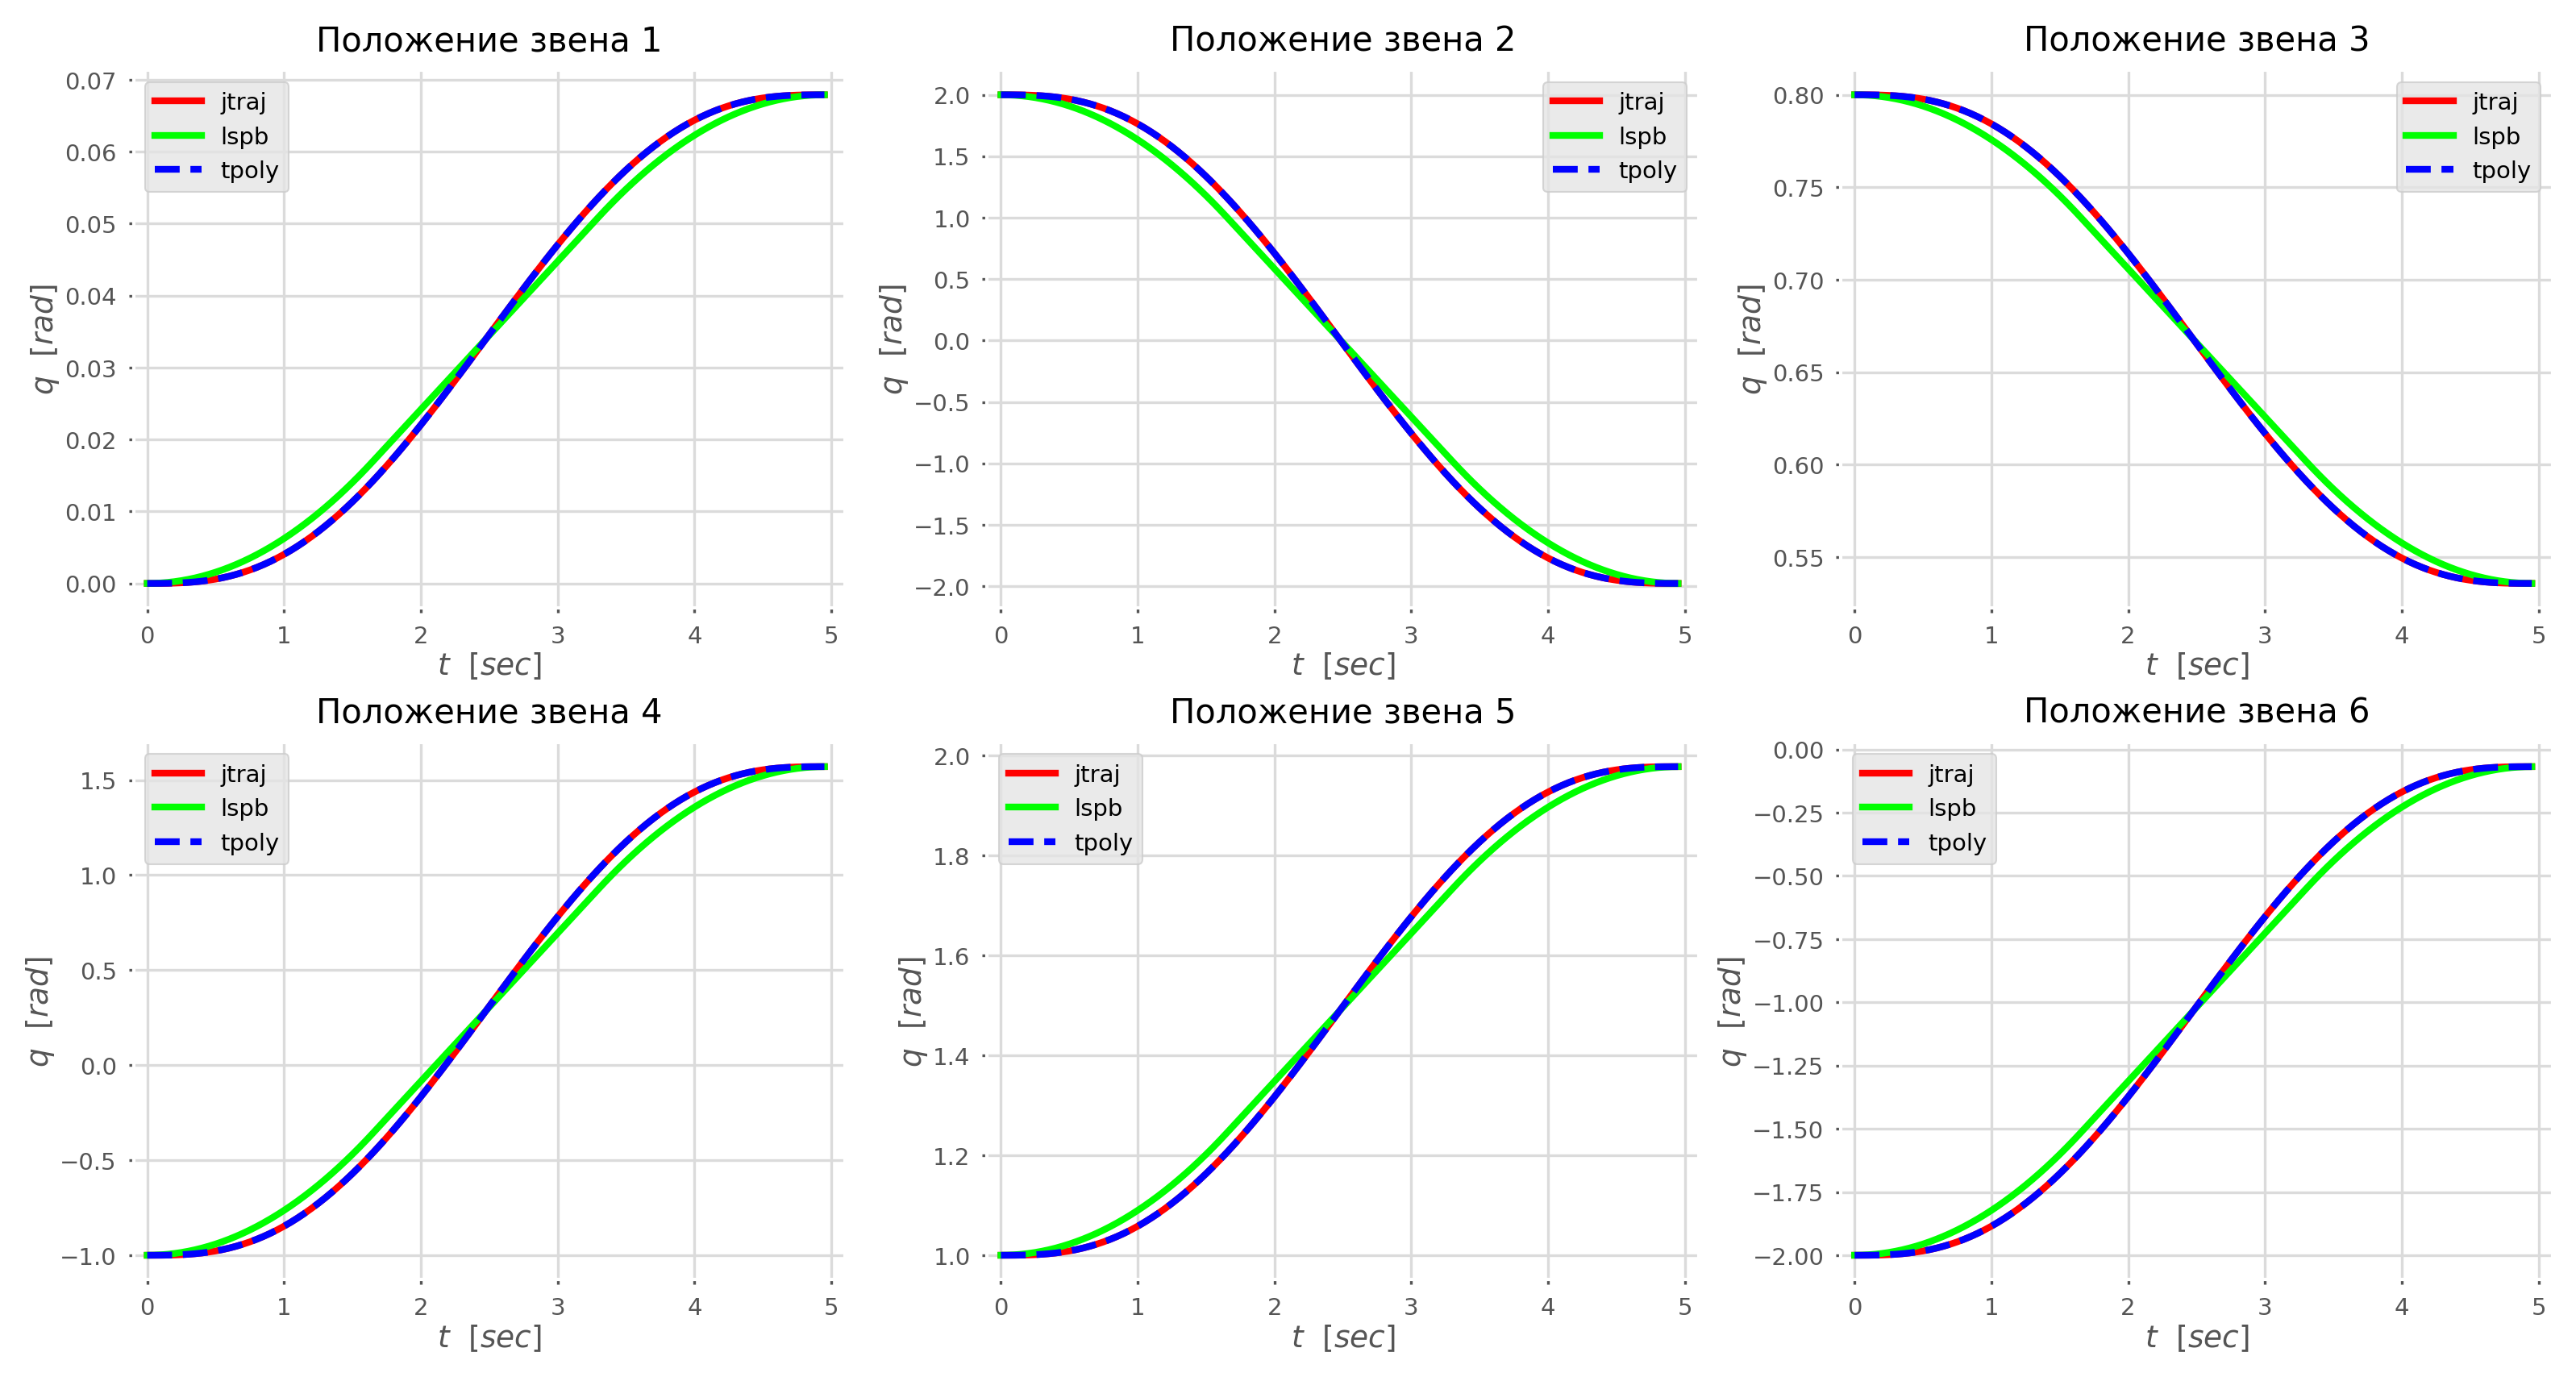

In [50]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Положение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики скоростей для каждого звена

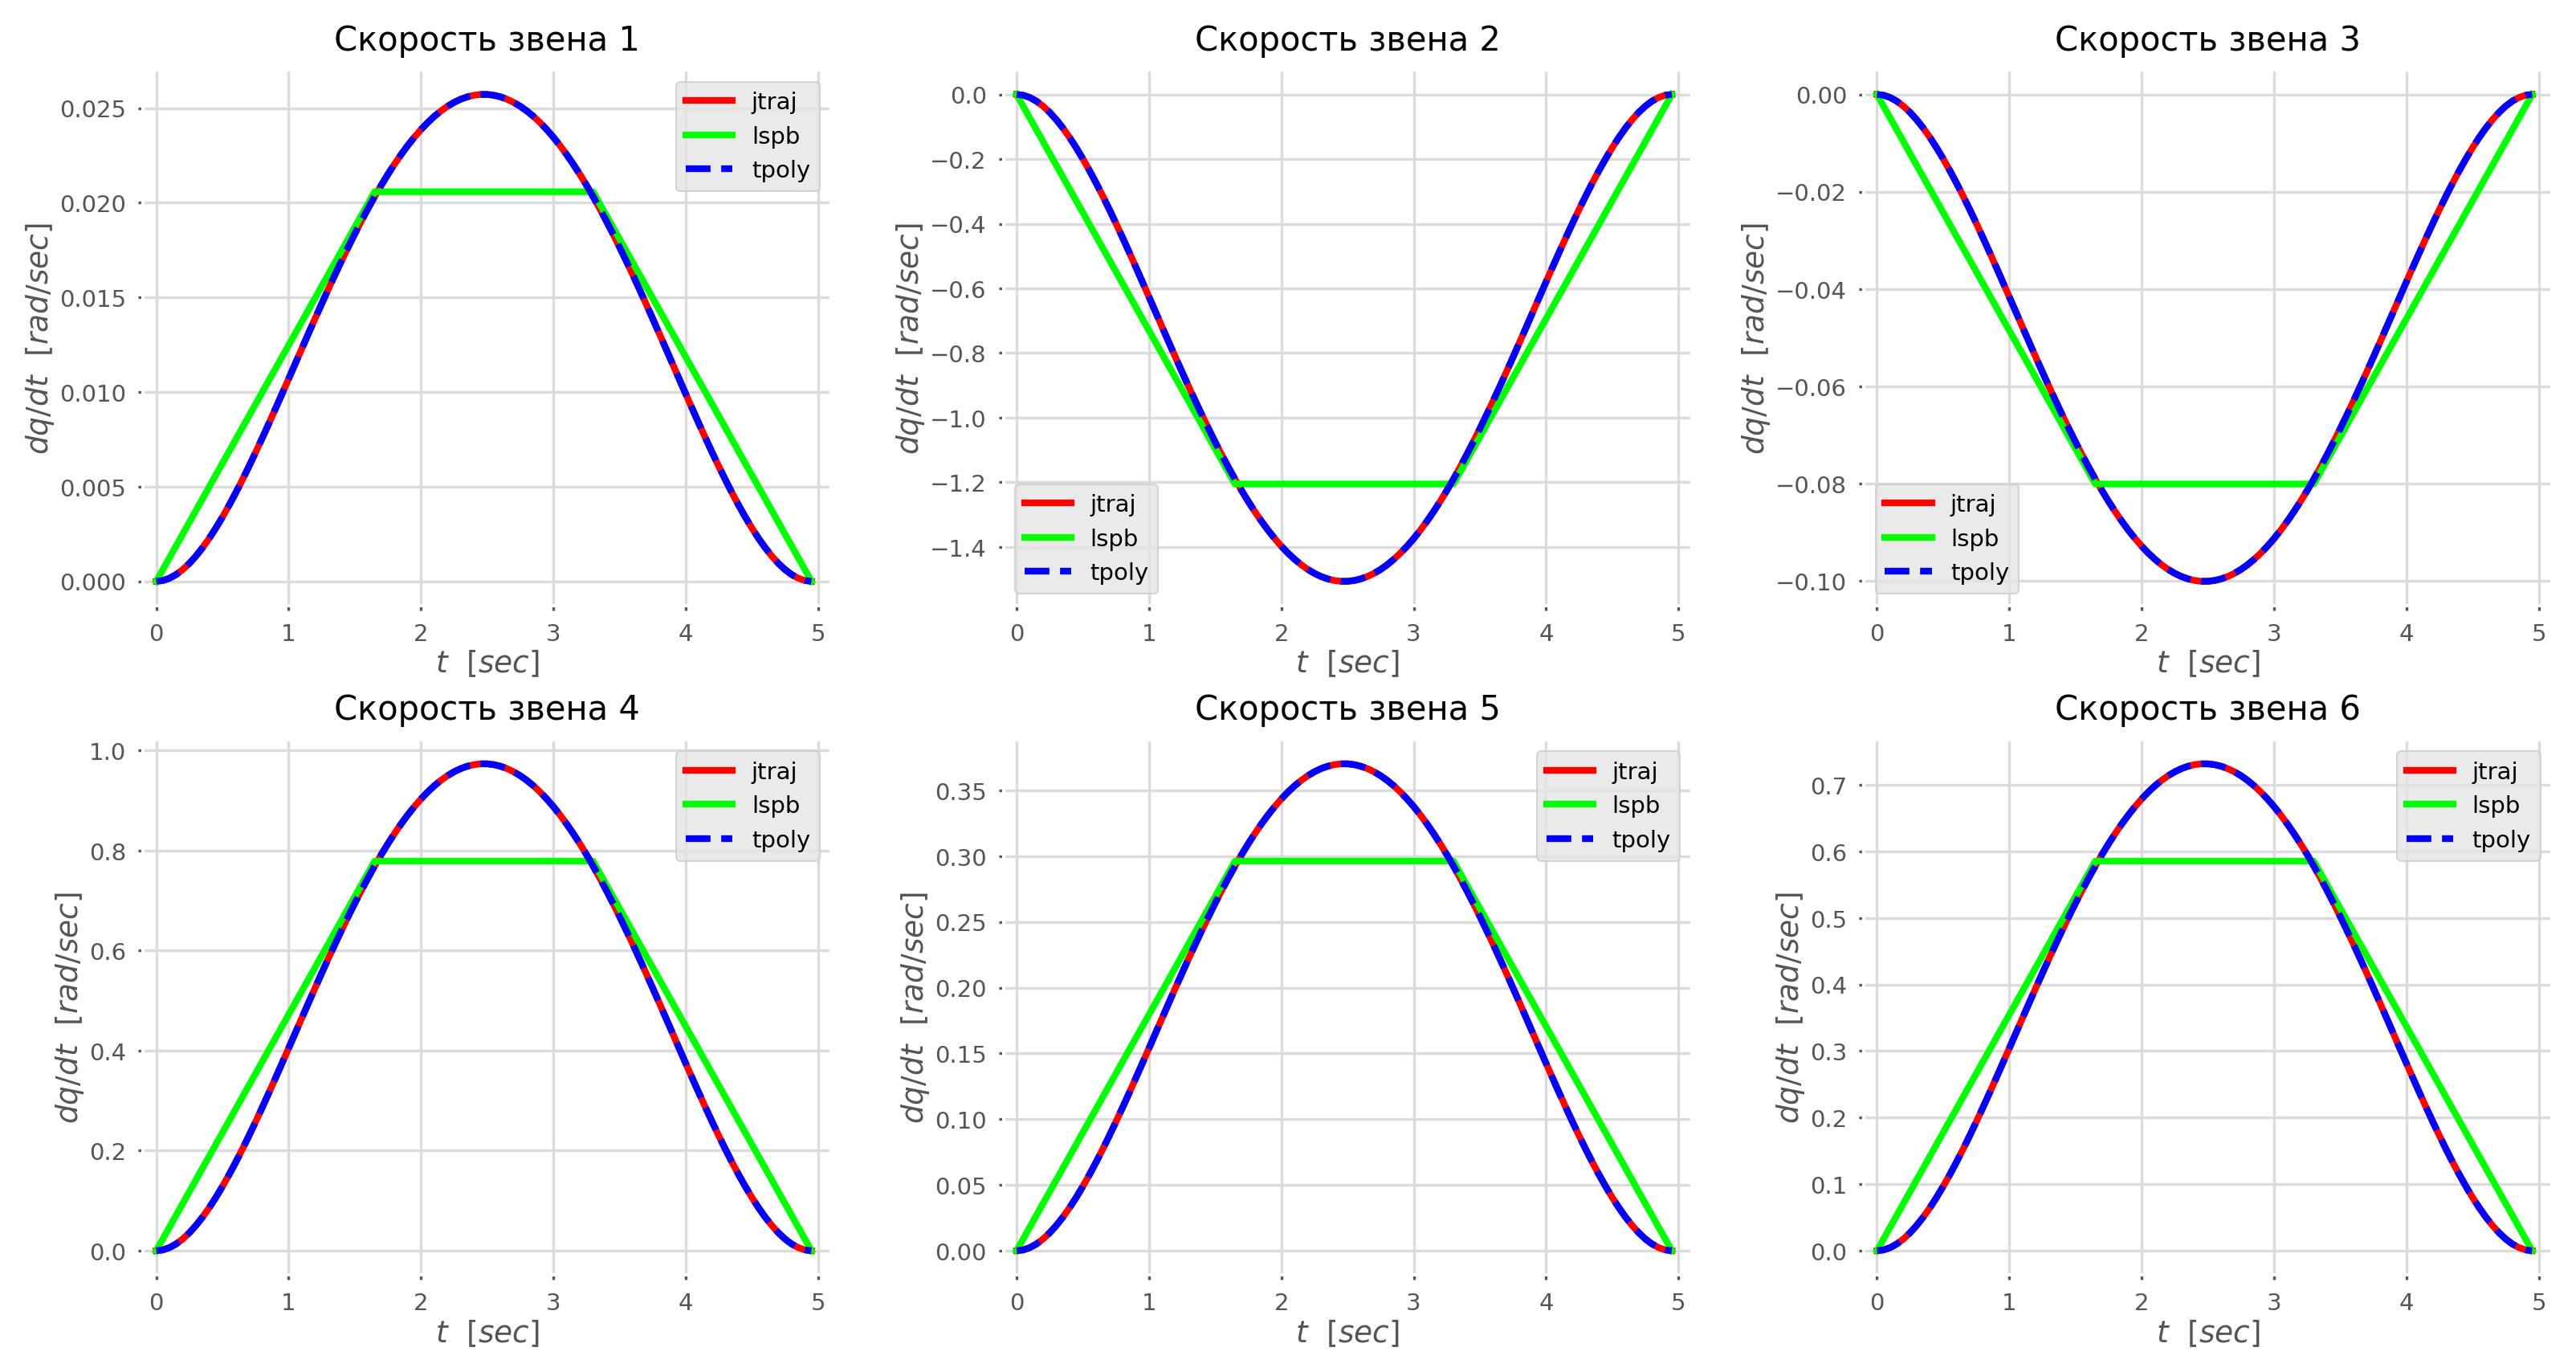

In [51]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Скорость звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики ускорений для каждого звена

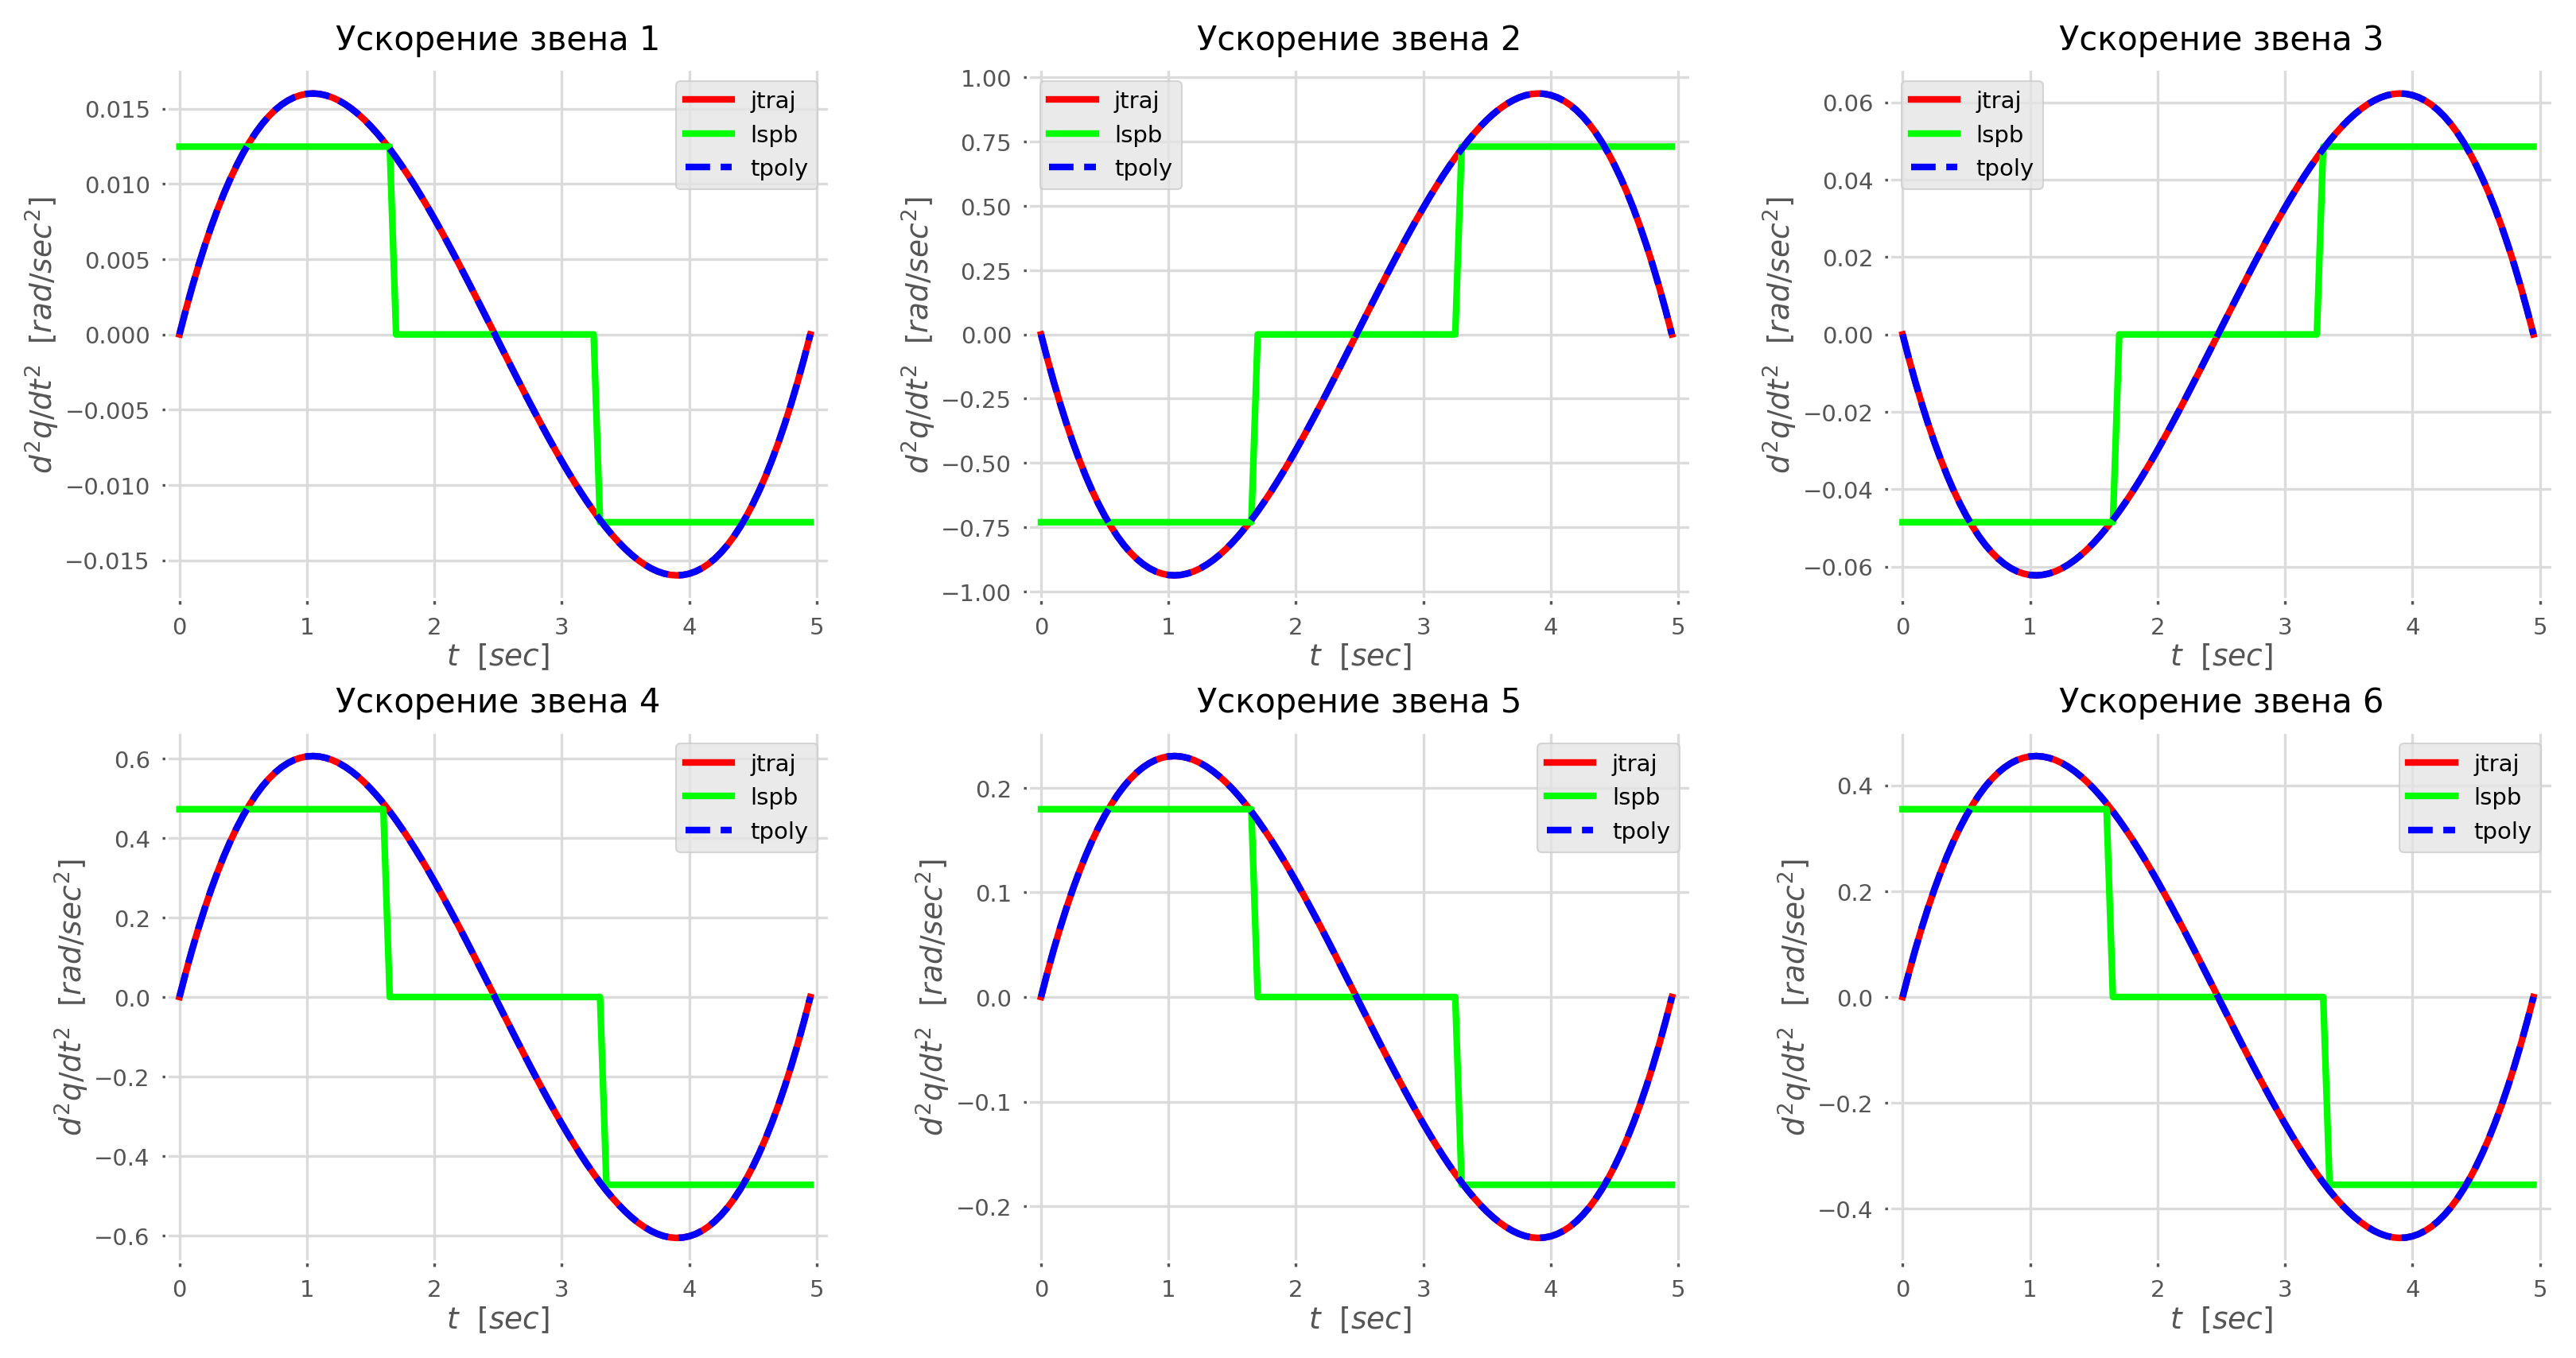

In [52]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Ускорение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

## Conclusions

- The Stanford manipulator was modeled.
- Forward and inverse kinematics were validated.
- The workspace was visualized with constraints.
- Trajectory planning was implemented using:
    - Polynomial interpolation (`jtraj`)
    - Trapezoidal velocity profile (`mtraj` with `trapezoidal`)
    - Quintic polynomial interpolation (`mtraj` with `quintic`)
- Velocity and acceleration profiles shown, validating the dynamic planning.

## Results and Analysis

### 1. Joint Space Trajectories

Plots illustrate the **position**, **velocity**, and **acceleration** profiles for all 6 joints over time.

- The red, blue, and green lines correspond to different interpolation strategies.
- All joints demonstrate **smooth and continuous motion**, which is essential for physical execution.

**Conclusion**: The trajectory generation appears to be correctly implemented, with all joints moving within expected physical limits.

---

### 2. End-Effector Trajectory


**Conclusion**: Trajectory execution matches the planned joint motion, indicating that the forward kinematics are functioning as expected.

---

### 3. Workspace Analysis

The large 3D scatter plot represents the **approximate reachable workspace** of the manipulator.

- The workspace is calculated using only the first 3 joints.

**Conclusion**: The current workspace plot gives a rough approximation of the robot’s reachability.

---

### Overall Summary

The experiment demonstrates that motion planning and workspace estimation are functional and give realistic approximations.
